<a href="https://colab.research.google.com/github/nirajvesaokar343/Sentimental-Analysis/blob/main/Sentiment_Analysis_of_Amazon_Alexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment analysis of Amazon Alexa reviews using scikit-learn and the Natural Language Toolkit (NLTK):

In [1]:
pip install colorama

In [2]:
!pip install seaborn

In [3]:
!pip install wordcloud

In [4]:
pip install matplotlib seaborn


In [5]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from google.colab import files
from colorama import Fore, Style  # Import colorama
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
uploaded = files.upload()

Saving amazon_alexa.csv to amazon_alexa.csv


In [7]:
# Load the dataset
df = pd.read_csv('amazon_alexa.csv')

# Create labels (1 for positive sentiment, 0 for negative sentiment)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

# Preprocess text data
nltk.download('punkt')

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    return ' '.join(words)

df['processed_text'] = df['verified_reviews'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred = rf_classifier.predict(X_test_tfidf)

Accuracy: 0.9031746031746032
              precision    recall  f1-score   support

           0       0.94      0.34      0.50        90
           1       0.90      1.00      0.95       540

    accuracy                           0.90       630
   macro avg       0.92      0.67      0.73       630
weighted avg       0.91      0.90      0.88       630



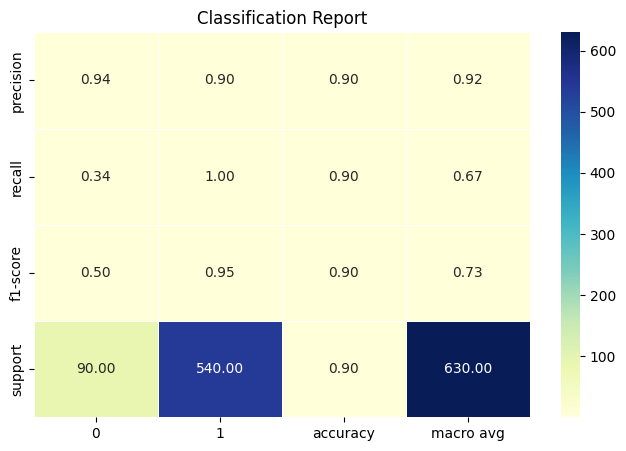

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Plot the classification report using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report")
plt.show()


# Positive Sentiment Analysis

In [13]:
# Create labels (1 for positive sentiment, 0 for negative sentiment)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

# Extract positive sentiment reviews
positive_reviews = df[df['sentiment'] == 1]['verified_reviews']

In [14]:
# Preprocess text data
nltk.download('punkt')

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    return words

positive_words = positive_reviews.apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
from collections import Counter

# Count word occurrences
all_words = [word for sublist in positive_words for word in sublist]
word_counts = Counter(all_words)

# Sort the words by frequency
common_words = word_counts.most_common()

In [16]:
# Display the most common words
print("Most Common Words in Positive Sentiment Reviews:")
for word, count in common_words[:10]:  # Change the number to display more or fewer common words
    print(f"{word}: {count}")

Most Common Words in Positive Sentiment Reviews:
i: 2680
the: 2522
it: 2368
to: 2223
and: 1864
my: 1203
a: 1134
is: 943
love: 938
for: 872


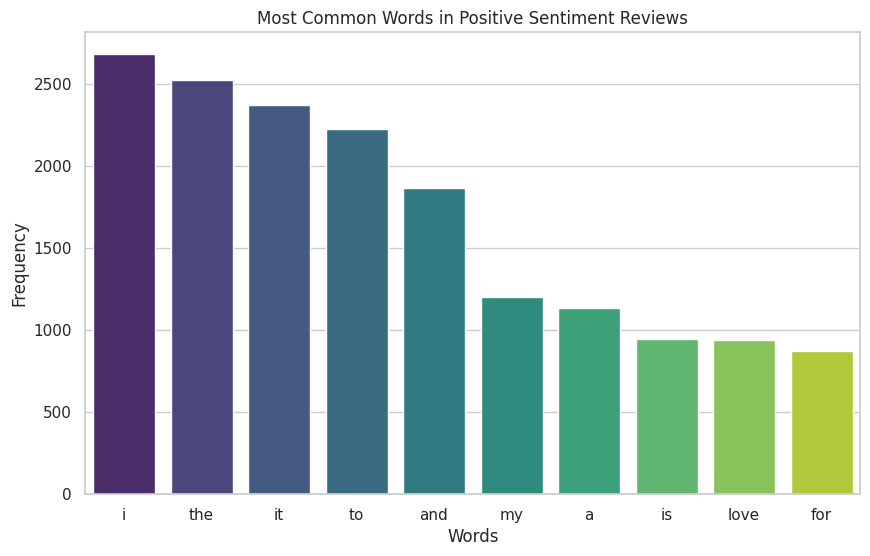

In [17]:
from colorama import Fore, Style

# Display the most common words with color-coded bars using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=[word for word, count in common_words[:10]],
            y=[count for word, count in common_words[:10]],
            palette="viridis")  # You can change the color palette if you prefer a different one
plt.title("Most Common Words in Positive Sentiment Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

Removing articles and prepositions

```
# This is formatted as code
```





In [18]:
# Preprocess text data
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

positive_words = positive_reviews.apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
from wordcloud import WordCloud

# Count word occurrences
all_words = [word for sublist in positive_words for word in sublist]
word_counts = Counter(all_words)

# Sort the words by frequency
common_words = word_counts.most_common()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

In [20]:
# Display the most common words
print("Most Common Words in Positive Sentiment Reviews (After Removing Prepositions and Articles):")
for word, count in common_words[:10]:  # Change the number to display more or fewer common words
    print(f"{word}: {count}")

Most Common Words in Positive Sentiment Reviews (After Removing Prepositions and Articles):
love: 938
great: 688
echo: 685
alexa: 519
music: 477
like: 422
use: 417
works: 342
easy: 330
one: 291


In [21]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9031746031746032
              precision    recall  f1-score   support

           0       0.94      0.34      0.50        90
           1       0.90      1.00      0.95       540

    accuracy                           0.90       630
   macro avg       0.92      0.67      0.73       630
weighted avg       0.91      0.90      0.88       630



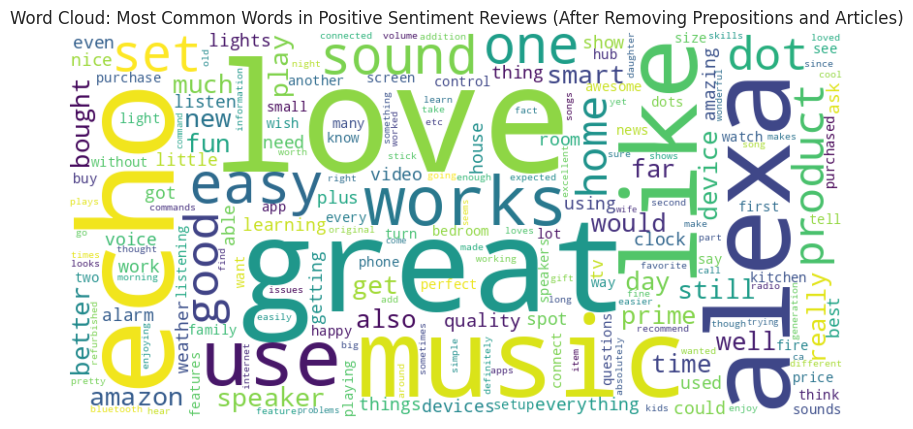

In [22]:
# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Common Words in Positive Sentiment Reviews (After Removing Prepositions and Articles)')
plt.show()

To stem a few words in the positive sentiment reviews, you can use the NLTK library's Porter Stemmer. The Porter Stemmer algorithm reduces words to their root or base form.

In [23]:
from nltk.stem import PorterStemmer

In [24]:
# Add your custom words to remove here
custom_words_to_remove = ['echo', 'alexa', 'music']

stop_words = set(stopwords.words('english') + custom_words_to_remove)
stemmer = PorterStemmer()

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

positive_words = positive_reviews.apply(preprocess_text)

In [25]:
# Count word occurrences
all_words = [word for sublist in positive_words for word in sublist]
word_counts = Counter(all_words)

# Sort the words by frequency
common_words = word_counts.most_common()

# Convert the list of tuples to separate lists for words and counts
words, counts = zip(*common_words)

# Create a DataFrame from the common words and their
data = pd.DataFrame({'Word': words, 'Count': counts})

In [26]:
# Display the most common words
print("Most Common Words in Positive Sentiment Reviews (After Removing Prepositions, Articles, and Custom Words):")
for word, count in common_words[:10]:  # Change the number to display more or fewer common words
    print(f"{word}: {count}")

Most Common Words in Positive Sentiment Reviews (After Removing Prepositions, Articles, and Custom Words):
love: 1042
great: 688
use: 627
work: 510
like: 452
sound: 354
easi: 330
one: 308
set: 306
play: 280


In [27]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9031746031746032
              precision    recall  f1-score   support

           0       0.94      0.34      0.50        90
           1       0.90      1.00      0.95       540

    accuracy                           0.90       630
   macro avg       0.92      0.67      0.73       630
weighted avg       0.91      0.90      0.88       630



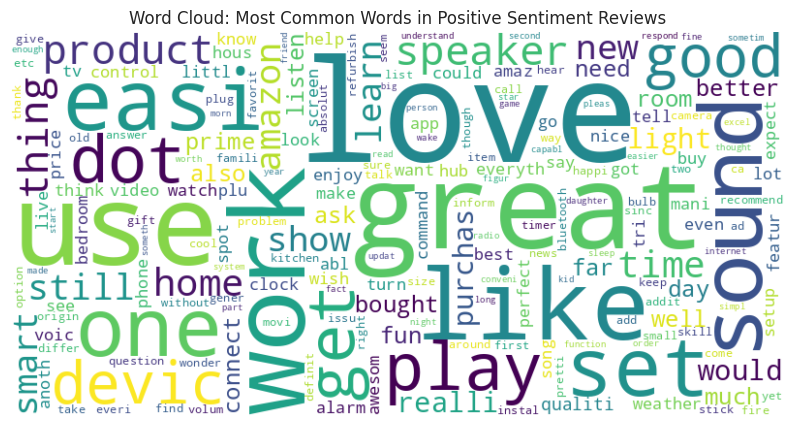

In [28]:
# Create a word cloud for the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Common Words in Positive Sentiment Reviews')
plt.show()

# Negative Sentiment Analysis

In [29]:
from nltk.probability import FreqDist

In [30]:
# Find common words in negative sentiment reviews
negative_reviews = df[df['sentiment'] == 0]['processed_text'].tolist()
negative_words = [word for review in negative_reviews for word in review.split()]

# Create a frequency distribution of words
freq_dist = FreqDist(negative_words)

In [31]:
# Display the most common words
print("Most common words in negative sentiment reviews:")
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

Most common words in negative sentiment reviews:
the: 734
i: 611
to: 598
it: 530
a: 369
and: 361
is: 289
not: 228
for: 189
this: 189


In [32]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9031746031746032
              precision    recall  f1-score   support

           0       0.94      0.34      0.50        90
           1       0.90      1.00      0.95       540

    accuracy                           0.90       630
   macro avg       0.92      0.67      0.73       630
weighted avg       0.91      0.90      0.88       630



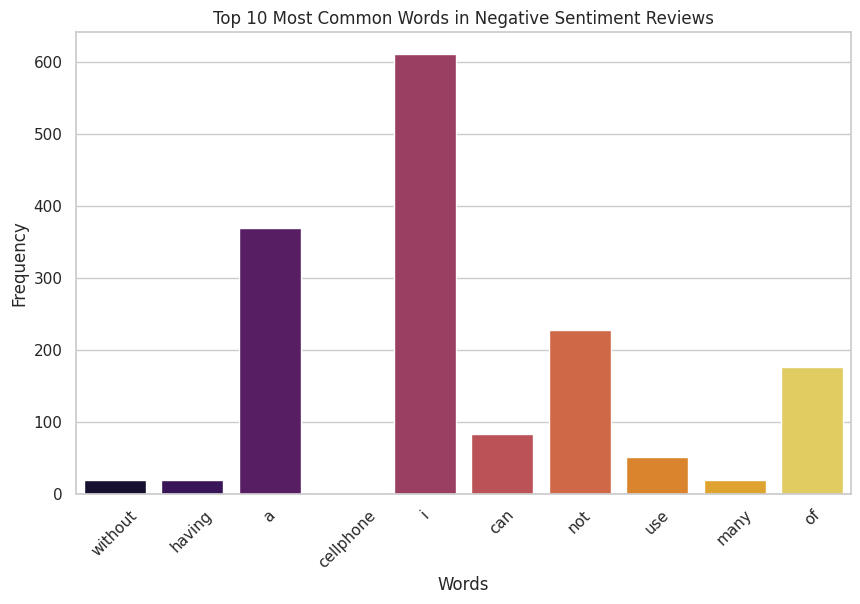

In [33]:
# Display the most common words using Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(freq_dist.keys())[:10], y=list(freq_dist.values())[:10], palette="inferno")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 Most Common Words in Negative Sentiment Reviews")
plt.xticks(rotation=45)
plt.show()

Removing articles and prepositions

In [34]:
# Create labels (1 for positive sentiment, 0 for negative sentiment)
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)

# Preprocess text data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    # Remove stopwords, articles, and prepositions
    stop_words = set(stopwords.words('english'))
    articles_prepositions = set(['a', 'an', 'the', 'in', 'on', 'at'])  # Add more if needed
    words = [word for word in words if word not in stop_words and word not in articles_prepositions]
    return ' '.join(words)

df['processed_text'] = df['verified_reviews'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# Find common words in negative sentiment reviews
negative_reviews = df[df['sentiment'] == 0]['processed_text'].tolist()
negative_words = [word for review in negative_reviews for word in review.split()]

# Create a frequency distribution of words
freq_dist = FreqDist(negative_words)

In [36]:
# Display the most common words
print("Most common words in negative sentiment reviews (After Removing Prepositions and Articles):")
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

Most common words in negative sentiment reviews (After Removing Prepositions and Articles):
echo: 144
alexa: 106
amazon: 82
like: 79
would: 77
device: 71
dot: 67
get: 65
music: 60
work: 59


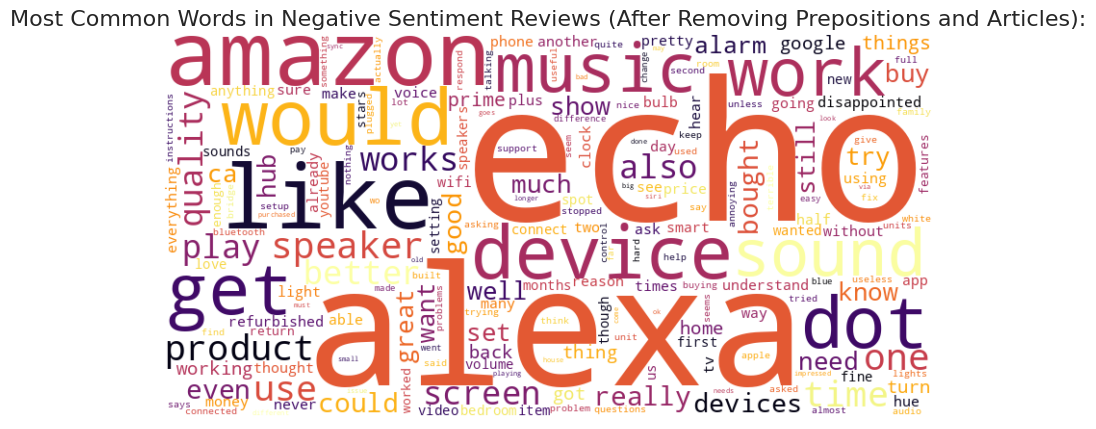

In [37]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate_from_frequencies(freq_dist)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Sentiment Reviews (After Removing Prepositions and Articles):", fontsize=16)
plt.show()

Removing unwanted words:

In [38]:
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]

    # Remove stopwords, articles, and prepositions
    stop_words = set(stopwords.words('english'))
    articles_prepositions = set(['a', 'an', 'the', 'in', 'on', 'at'])  # Add more if needed
    words = [word for word in words if word not in stop_words and word not in articles_prepositions]

    # Remove specific words like "amazon" and "echo"
    words = [word for word in words if word not in ['amazon', 'alexa', 'echo', 'dot', 'like', 'music', 'speaker']]
    return ' '.join(words)

df['processed_text'] = df['verified_reviews'].apply(preprocess_text)

# Split the data into training and testing sets
X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build and train the sentiment analysis model (Random Forest Classifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

In [39]:
# Find common words in negative sentiment reviews
negative_reviews = df[df['sentiment'] == 0]['processed_text'].tolist()
negative_words = [word for review in negative_reviews for word in review.split()]

# Create a frequency distribution of words
freq_dist = FreqDist(negative_words)

In [40]:
# Display the most common words
print("Most common words in negative sentiment reviews:")
for word, frequency in freq_dist.most_common(10):
    print(f"{word}: {frequency}")

Most common words in negative sentiment reviews:
would: 77
device: 71
get: 65
work: 59
sound: 55
one: 55
product: 52
use: 51
time: 51
play: 43


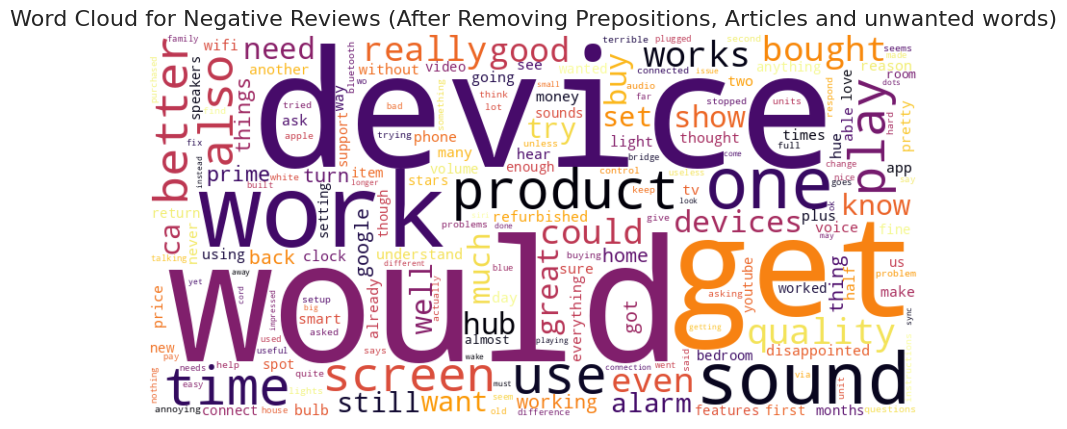

In [41]:
# Generate and display the word cloud for negative reviews
negative_text = df[df['sentiment'] == 0]['processed_text'].str.cat(sep=' ')
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (After Removing Prepositions, Articles and unwanted words)', fontsize=16)
plt.show()

# Comparision of positive and negative reviews using Plotly Express:

In [44]:
import plotly.graph_objects as go
import plotly.express as px

# Create Plotly bar charts for positive and negative words
fig = go.Figure()

# Get the most common words
most_common_positive_words = dict(common_words[:12])
most_common_negative_words = dict(freq_dist.most_common(12))

In [45]:
# Create Plotly subplot with two horizontal bar charts
fig = px.bar(y=list(most_common_positive_words.keys()), x=list(most_common_positive_words.values()),
             orientation='h', text=list(most_common_positive_words.values()),
             labels={'x': 'Frequency', 'y': 'Positive Words'},
             title='Most Frequent Positive Words', color_discrete_sequence=['green'])

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.add_trace(px.bar(y=list(most_common_negative_words.keys()), x=list(most_common_negative_words.values()),
                      orientation='h', text=list(most_common_negative_words.values()),
                      labels={'x': 'Frequency', 'y': 'Negative Words'},
                      title='Most Frequent Negative Words', color_discrete_sequence=['red']).data[0])

fig.update_layout(barmode='stack', bargap=0.15)

fig.show()

# Comparision of positive and negative reviews using Altair:

Using Altair to create a more interactive and visually appealing comparison of the most frequent positive and negative words used in the Amazon Alexa reviews.

In [46]:
pip install altair vega_datasets

In [47]:
import altair as alt

# Get the most common words
most_common_positive_words = common_words[:12]
most_common_negative_words = freq_dist.most_common(12)

In [48]:
# Create DataFrames for Altair visualization
df_positive = pd.DataFrame(most_common_positive_words, columns=['Word', 'Frequency'])
df_negative = pd.DataFrame(most_common_negative_words, columns=['Word', 'Frequency'])

# Visualization using Altair
positive_chart = alt.Chart(df_positive).mark_bar().encode(
    x='Frequency:Q',
    y='Word:O',
    color=alt.ColorValue('steelblue')
).properties(
    title='Most Frequent Positive Words',
    width=400
)

negative_chart = alt.Chart(df_negative).mark_bar().encode(
    x='Frequency:Q',
    y='Word:O',
    color=alt.ColorValue('firebrick')
).properties(
    title='Most Frequent Negative Words',
    width=400
)

# Combine the charts
combined_chart = positive_chart | negative_chart

# Display the visualization in the Jupyter Notebook
combined_chart

alt.HConcatChart(...)

# Final Accuracy:

Accuracy: 0.9079365079365079
              precision    recall  f1-score   support

           0       0.90      0.40      0.55        90
           1       0.91      0.99      0.95       540

    accuracy                           0.91       630
   macro avg       0.90      0.70      0.75       630
weighted avg       0.91      0.91      0.89       630



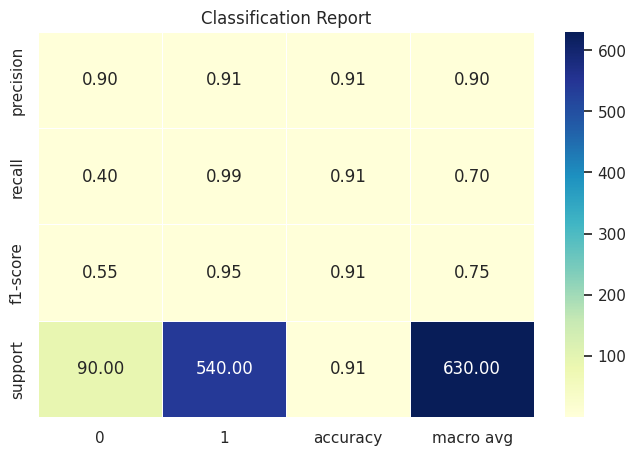

In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Plot the classification report using seaborn
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Classification Report")
plt.show()

**Extra:**

# Customer Satisfaction Monitoring

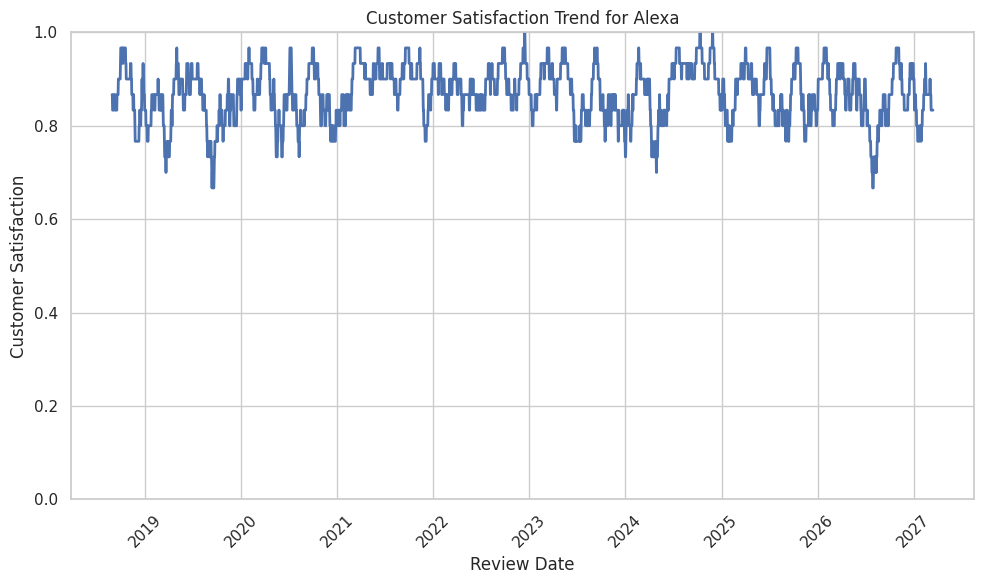

In [50]:
# Customer Satisfaction Monitoring

# Concatenate the training and testing sets to get the complete dataset
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# Combine processed text and sentiment labels into a new DataFrame
df_full = pd.DataFrame({'processed_text': X_full, 'sentiment': y_full})

# Add a new column 'review_date' to track the date of each review (this is just a sample, you can use actual dates)
df_full['review_date'] = pd.date_range(start='2018-07-31', periods=len(df_full))

# Sort the DataFrame by review_date in ascending order
df_full = df_full.sort_values(by='review_date')

# Calculate the rolling average sentiment over a certain period (e.g., 30 days)
rolling_avg_period = 30
df_full['rolling_avg_sentiment'] = df_full['sentiment'].rolling(rolling_avg_period).mean()

# Plot Customer Satisfaction Trend
plt.figure(figsize=(10, 6))
plt.plot(df_full['review_date'], df_full['rolling_avg_sentiment'], color='b', linewidth=2)
plt.xlabel('Review Date')
plt.ylabel('Customer Satisfaction')
plt.title('Customer Satisfaction Trend for Alexa')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

Matplotlib is used to plot the Customer Satisfaction Trend over time. The x-axis represents the review date, and the y-axis represents the rolling average sentiment. The plot allows Amazon and organizations to monitor the overall satisfaction trend of Alexa's customers over time.

To perform Customer Satisfaction Monitoring using positive and negative words,  enhancement of the sentiment analysis code by using lexicons of positive and negative words is required. It will count the occurrences of positive and negative words in the customer reviews to gauge overall satisfaction.


In [51]:
from nltk.sentiment.util import mark_negation


# Download the positive and negative word lexicons
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

After calculating the positive and negative word counts for each review, it computes an overall sentiment score as the difference between the positive and negative word counts. A positive score indicates more positive sentiments, while a negative score indicates more negative sentiments.

In [52]:
def count_positive_words(text):
    positive_lexicon = set(nltk.corpus.opinion_lexicon.positive())
    words = nltk.word_tokenize(text)
    positive_words = [word for word in words if word in positive_lexicon]
    return len(positive_words)

def count_negative_words(text):
    negative_lexicon = set(nltk.corpus.opinion_lexicon.negative())
    words = nltk.word_tokenize(text)
    # Mark negation using _NEG suffix
    words = mark_negation(words)
    negative_words = [word for word in words if word in negative_lexicon]
    return len(negative_words)

# Count positive and negative words in the reviews
df['positive_word_count'] = df['processed_text'].apply(count_positive_words)
df['negative_word_count'] = df['processed_text'].apply(count_negative_words)

# Calculate overall sentiment score
df['sentiment_score'] = df['positive_word_count'] - df['negative_word_count']

# Customer Satisfaction Monitoring based on sentiment score
average_sentiment_score_lexicon = df['sentiment_score'].mean()
print("Average Sentiment Score using Lexicon-based Approach:", average_sentiment_score_lexicon)

# Perform Sentiment Analysis using the RandomForestClassifier model
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred = rf_classifier.predict(X_test_tfidf)

average_sentiment_score_ml = y_pred.mean()
print("Average Sentiment Score using Machine Learning Model:", average_sentiment_score_ml)

# Customer Satisfaction Interpretation for both approaches
if average_sentiment_score_lexicon > 0:
    print("Customers are generally satisfied with Alexa (Lexicon-based approach).")
elif average_sentiment_score_lexicon < 0:
    print("Customers have some negative sentiments towards Alexa (Lexicon-based approach).")
else:
    print("Customers have mixed sentiments about Alexa (Lexicon-based approach).")

if average_sentiment_score_ml > 0:
    print("Customers are generally satisfied with Alexa (Machine Learning Model).")
elif average_sentiment_score_ml < 0:
    print("Customers have some negative sentiments towards Alexa (Machine Learning Model).")
else:
    print("Customers have mixed sentiments about Alexa (Machine Learning Model).")

Average Sentiment Score using Lexicon-based Approach: 1.5222222222222221
Average Sentiment Score using Machine Learning Model: 0.9365079365079365
Customers are generally satisfied with Alexa (Lexicon-based approach).
Customers are generally satisfied with Alexa (Machine Learning Model).


Finally, it calculates the average sentiment score across all reviews to monitor overall customer satisfaction. The interpretation of the average sentiment score helps understand the general sentiment towards Alexa. It also print the top positive and negative reviews based on the sentiment score for further analysis.

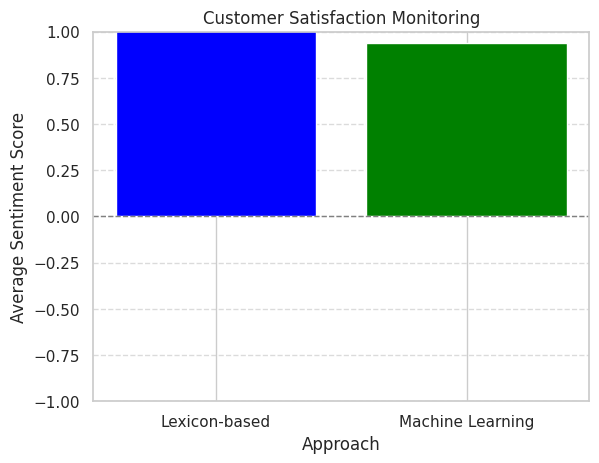

In [53]:
# Plotting the average sentiment scores
labels = ['Lexicon-based', 'Machine Learning']
scores = [average_sentiment_score_lexicon, average_sentiment_score_ml]

plt.bar(labels, scores, color=['blue', 'green'])
plt.xlabel('Approach')
plt.ylabel('Average Sentiment Score')
plt.title('Customer Satisfaction Monitoring')
plt.ylim(-1, 1)
plt.axhline(y=0, color='gray', linestyle='dashed', linewidth=1)
plt.grid(axis='y', linestyle='dashed', alpha=0.7)
plt.show()

# Exploratory Data Analysis (EDA) on the dataset:



 Exploring the distribution of sentiment labels

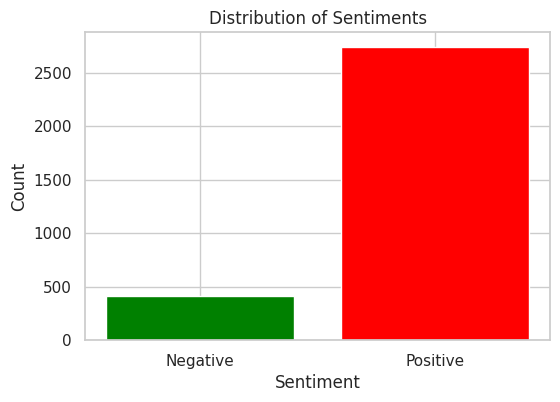

In [54]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'green'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()